In [72]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
import json
import datetime

In [73]:
with open('../data/clean/cleaned_airlines.json', 'r') as f:
    df_airlines = pd.json_normalize(json.load(f))

In [74]:
df_airlines

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet Airlines Inc.
6,F9,Frontier Airlines Inc.
7,FL,AirTran Airways Corporation
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air


In [75]:
df_weather = pd.read_csv("../data/clean/cleaned_weather.csv")

In [76]:
df_weather.columns

Index(['origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp', 'humid',
       'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib',
       'time_hour'],
      dtype='object')

In [77]:
df_airports = pd.read_csv("../data/clean/cleaned_airports.csv")

In [78]:
df_airports.head(3)

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044.0,-5.0,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264.0,-6.0,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801.0,-6.0,A,America/Chicago


In [79]:
df_airports.name.nunique()

1440

In [80]:
df_flights = pd.read_csv("../data/clean/cleaned_flights.csv")

In [81]:
df_flights.dtypes

year               int64
month              int64
day                int64
dep_time          object
sched_dep_time     int64
dep_delay         object
arr_time          object
sched_arr_time     int64
arr_delay         object
carrier           object
flight             int64
tailnum           object
origin            object
dest              object
air_time          object
distance           int64
hour               int64
minute             int64
time_hour         object
id                 int64
dtype: object

In [82]:
df_flights.head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,id
0,2021,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2021-01-01T05:00:00Z,1
1,2021,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2021-01-01T05:00:00Z,2
2,2021,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2021-01-01T05:00:00Z,3


In [83]:
df_flights[["origin","dest"]].nunique()

origin      3
dest      103
dtype: int64

In [84]:
vol = df_flights[["carrier","air_time"]]==" "
print("Le nombre se vol annulé: ", vol.value_counts().iloc[1])

Le nombre se vol annulé:  7273


In [85]:
df_flights["origin"][:3]

0    EWR
1    LGA
2    JFK
Name: origin, dtype: object

In [86]:
#Question 2 Quel est l’aéroport de départ le plus emprunté ? 

plus_emprunte = df_flights[["origin","dest"]].value_counts()
print(f"le depart le plus emprunté: {plus_emprunte[0:3]}")


le depart le plus emprunté: origin  dest
JFK     LAX     8447
LGA     ATL     7816
        ORD     6500
Name: count, dtype: int64


In [87]:
# Quelles sont les 10 destinations les plus (moins) prisées 
# (en indiquant le nom complet des destinations et non juste le code correspondant et le % corresp pour chaque destination) ?
top_10_destinations = df_flights[["origin", "dest"]].value_counts()
print(top_10_destinations[0:10])
# Quelle sont les 10 avions qui ont le plus (moins) décollé ?

origin  dest
JFK     LAX     8447
LGA     ATL     7816
        ORD     6500
JFK     SFO     6132
LGA     CLT     4486
EWR     ORD     4423
JFK     BOS     4410
LGA     MIA     4380
JFK     MCO     4106
EWR     BOS     3939
Name: count, dtype: int64


In [88]:
moins_10_destinations = df_flights[["origin", "dest"]].value_counts().sort_values(ascending=True)
print(moins_10_destinations[0:10])

origin  dest
JFK     STL     1
LGA     LEX     1
JFK     BHM     1
        MEM     1
EWR     SBN     1
JFK     JAC     2
LGA     MYR     2
        SBN     3
JFK     SDF     8
LGA     AVL     9
Name: count, dtype: int64


In [89]:
df_flights[["tailnum","carrier"]].value_counts()[0:10]

tailnum  carrier
         9E         786
         UA         563
         US         513
N725MQ   MQ         443
N723MQ   MQ         394
N713MQ   MQ         385
N722MQ   MQ         378
N711MQ   MQ         376
N258JB   B6         332
N353JB   B6         316
Name: count, dtype: int64

In [90]:
df_flights[["tailnum","carrier"]].value_counts().sort_values(ascending=True)[0:10]

tailnum  carrier
N838AW   US         1
N907DA   DL         1
N302AS   AS         1
N7ASAA   AA         1
N7ALAA   AA         1
N287AT   FL         1
N809NW   DL         1
N344SW   WN         1
N810AW   US         1
N812AW   US         1
Name: count, dtype: int64

In [91]:
df_flights.dtypes

year               int64
month              int64
day                int64
dep_time          object
sched_dep_time     int64
dep_delay         object
arr_time          object
sched_arr_time     int64
arr_delay         object
carrier           object
flight             int64
tailnum           object
origin            object
dest              object
air_time          object
distance           int64
hour               int64
minute             int64
time_hour         object
id                 int64
dtype: object

    """
    Question 1:
    Constater qu’on peut reconstituer l’information sched_dep_time à partir de year, month, day, hour et minute. 
    Transformer alors cette colonne en type datetime. Transformer également dep_time, arr_time et sched_arr_time et 
    supprimer les colonnes year, month, day, hour, minute.
    """

In [92]:
# Handle potential leading spaces and non-numeric values
df_flights['dep_time_hour'] = pd.to_numeric(df_flights['dep_time'].str[:1], errors='coerce').fillna(0).astype(int)
df_flights['dep_time_minute'] = pd.to_numeric(df_flights['dep_time'].str[1:], errors='coerce').fillna(0).astype(int)

# Create the datetime column
df_flights['depart_time_dt'] = pd.to_datetime(
    {'year': df_flights['year'], 'month': df_flights['month'], 'day': df_flights['day'],
     'hour': df_flights['dep_time_hour'], 'minute': df_flights['dep_time_minute']})

# Optional: Drop original 'dep_time' column (if no longer needed)
df_flights.drop(['dep_time','dep_time_minute','dep_time_hour'], axis=1, inplace=True)

In [93]:

df_flights['sched_dep_time'] = df_flights['sched_dep_time'].fillna('00')  # Fill NaNs with '00'
df_flights['sched_dep_time'] = df_flights['sched_dep_time'].astype(str)

df_flights['sched_dep_time_hour'] = pd.to_numeric(df_flights['sched_dep_time'].str[:1], errors='coerce').fillna(0).astype(int)
df_flights['sched_dep_time_minute'] = pd.to_numeric(df_flights['sched_dep_time'].str[1:], errors='coerce').fillna(0).astype(int)

# df_flights.drop('dep_time', axis=1, inplace=True)

# Create the datetime column
df_flights['sched_depart_time_dt'] = pd.to_datetime(
    {'year': df_flights['year'], 'month': df_flights['month'], 'day': df_flights['day'],
     'hour': df_flights['sched_dep_time_hour'], 'minute': df_flights['sched_dep_time_minute']})

# Optional: Drop original 'dep_time' column (if no longer needed)
df_flights.drop(['sched_dep_time','sched_dep_time_hour','sched_dep_time_minute'], axis=1, inplace=True)

In [94]:

df_flights['arr_time'] = df_flights['arr_time'].fillna('00')  # Fill NaNs with '00'
df_flights['arr_time'] = df_flights['arr_time'].astype(str)

df_flights['arr_time_hour'] = pd.to_numeric(df_flights['arr_time'].str[:1], errors='coerce').fillna(0).astype(int)
df_flights['arr_time_minute'] = pd.to_numeric(df_flights['arr_time'].str[1:], errors='coerce').fillna(0).astype(int)

# df_flights.drop('dep_time', axis=1, inplace=True)

# Create the datetime column
df_flights['arrive_time_dt'] = pd.to_datetime(
    {'year': df_flights['year'], 'month': df_flights['month'], 'day': df_flights['day'],
     'hour': df_flights['arr_time_hour'], 'minute': df_flights['arr_time_minute']})

# Optional: Drop original 'dep_time' column (if no longer needed)
df_flights.drop(['arr_time','arr_time_hour','arr_time_minute'], axis=1, inplace=True)

In [95]:
df_flights['sched_arr_time'] = df_flights['sched_arr_time'].fillna('00')  # Fill NaNs with '00'
df_flights['sched_arr_time'] = df_flights['sched_arr_time'].astype(str)

df_flights['sched_arr_time_hour'] = pd.to_numeric(df_flights['sched_arr_time'].str[:1], errors='coerce').fillna(0).astype(int)
df_flights['sched_arr_time_minute'] = pd.to_numeric(df_flights['sched_arr_time'].str[1:], errors='coerce').fillna(0).astype(int)

# df_flights.drop('dep_time', axis=1, inplace=True)

# Create the datetime column
df_flights['sched_arrive_time_dt'] = pd.to_datetime(
    {'year': df_flights['year'], 'month': df_flights['month'], 'day': df_flights['day'],
     'hour': df_flights['sched_arr_time_hour'], 'minute': df_flights['sched_arr_time_minute']})

# Optional: Drop original 'dep_time' column (if no longer needed)
df_flights.drop(['sched_arr_time','sched_arr_time_hour','sched_arr_time_minute'], axis=1, inplace=True)

In [96]:

# Drop redundant columns in dataframe
df_flights.drop(columns=['year', 'month', 'day', 'hour', 'minute'], inplace=True) 

In [97]:
df_flights.head(5)

,dep_delay,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,time_hour,id,depart_time_dt,sched_depart_time_dt,arrive_time_dt,sched_arrive_time_dt
0,2,11,UA,1545,N14228,EWR,IAH,227,1400,2021-01-01T05:00:00Z,1,2021-01-01 05:17:00,2021-01-01 05:15:00,2021-01-01 08:30:00,2021-01-01 08:19:00
1,4,20,UA,1714,N24211,LGA,IAH,227,1416,2021-01-01T05:00:00Z,2,2021-01-01 05:33:00,2021-01-01 05:29:00,2021-01-01 08:50:00,2021-01-01 08:30:00
2,2,33,AA,1141,N619AA,JFK,MIA,160,1089,2021-01-01T05:00:00Z,3,2021-01-01 05:42:00,2021-01-01 05:40:00,2021-01-01 09:23:00,2021-01-01 08:50:00
3,-1,-18,B6,725,N804JB,JFK,BQN,183,1576,2021-01-01T05:00:00Z,4,2021-01-01 05:44:00,2021-01-01 05:45:00,2021-01-01 01:04:00,2021-01-01 01:22:00
4,-6,-25,DL,461,N668DN,LGA,ATL,116,762,2021-01-01T06:00:00Z,5,2021-01-01 05:54:00,2021-01-01 06:00:00,2021-01-01 08:12:00,2021-01-01 08:37:00


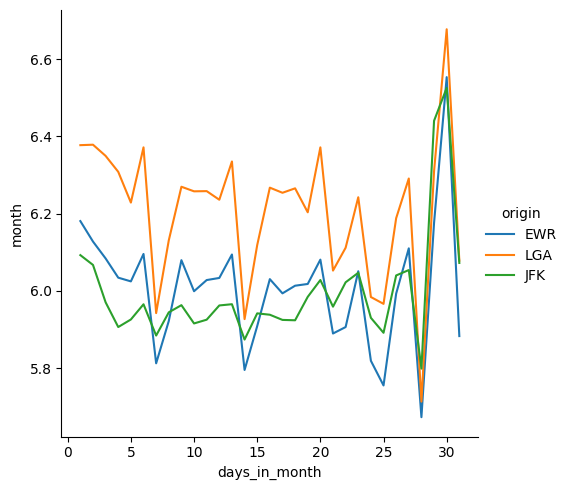

In [98]:

# Convert 'depart_time_dt' to datetime format (assuming it's a string)
df_flights['depart_time_dt'] = pd.to_datetime(df_flights['depart_time_dt'], utc=True)

# Extract month for calculations (assuming 'depart_time_dt' is datetime)
df_flights['month'] = df_flights['depart_time_dt'].dt.month
df_flights['days_in_month'] = df_flights['depart_time_dt'].dt.day
# df_flights['days_in_month']

# Daily traffic calculation (assuming 'traffic' is total traffic)
df_flights['daily_traffic'] = df_flights['month'] / df_flights['days_in_month']
# df_flights['daily_traffic']
# Calculate monthly average traffic for each airport (numerical values)
monthly_avg_traffic = df_flights.groupby(['origin', 'month'])['days_in_month'].mean().unstack()
monthly_avg_traffic 


# Create a faceted line plot with average lines (using numerical month)
sns.relplot(
    x='days_in_month',   # Use the numerical 'month' column
    y='month',
    data=df_flights,
    hue='origin',
    kind='line',
    errorbar=None,  # Remove confidence intervals for clarity
    # facet_col='origin'
)



In [99]:

df_flights['month'] = df_flights['depart_time_dt'].dt.month
df_flights['days_in_month'] = df_flights['depart_time_dt'].dt.day
monthly_trafic = df_flights.groupby(["origin", "month"])["days_in_month"].value_counts(ascending=False)
print(monthly_trafic)

origin  month  days_in_month
EWR     1      2                350
               10               344
               31               344
               11               343
               17               343
                               ... 
LGA     12     24               224
               31               223
               25               210
               7                189
               14               189
Name: count, Length: 828, dtype: int64


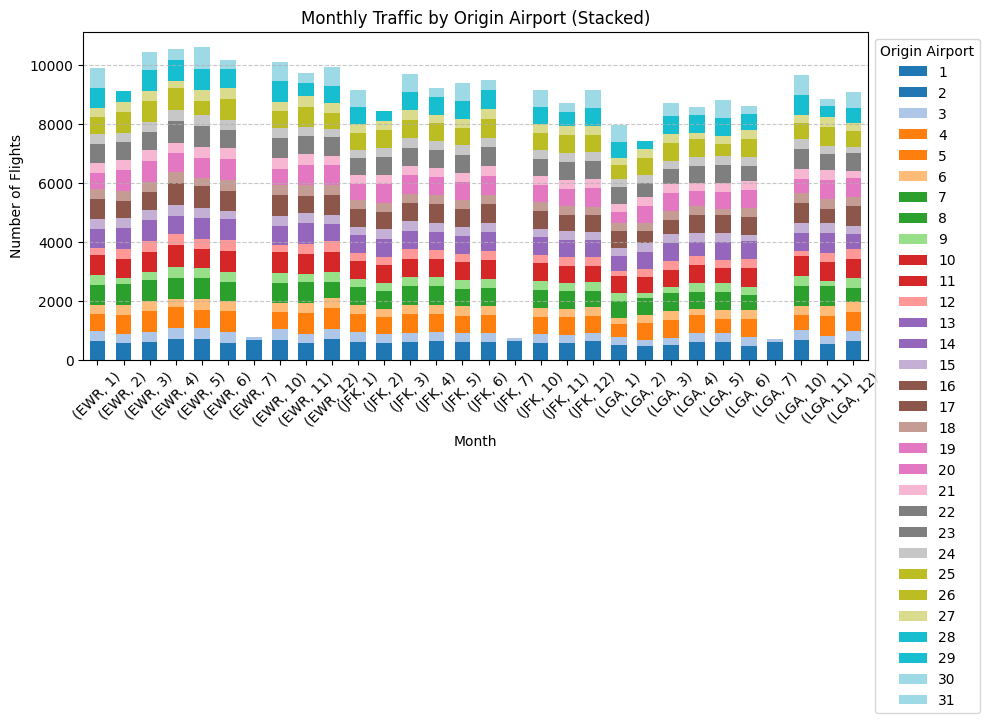

In [100]:


# Assuming 'depart_time_dt' is already converted to datetime format

# Extract month and days_in_month
df_flights['month'] = df_flights['depart_time_dt'].dt.month
df_flights['days_in_month'] = df_flights['depart_time_dt'].dt.day

# Calculate monthly traffic (number of flights) for each origin and month
monthly_traffic = df_flights.groupby(["origin", "month"])["days_in_month"].value_counts().unstack()

# Create a well-structured stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size for better readability

monthly_traffic.plot(
    kind='bar',
    stacked=True,
    colormap='tab20',  # Adjust colormap if needed (e.g., 'Set2' for fewer origins)
    width=0.6,  # Adjust bar width for clarity
    ax=ax
)

# Customize plot elements for readability
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Monthly Traffic by Origin Airport (Stacked)')
plt.legend(title='Origin Airport', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for reference

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


C:\Users\Pierre-Antoine\AppData\Local\Temp\ipykernel_9700\1018012879.py:14: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  monthly_growth_rate = monthly_traffic.pct_change().unstack() * 100
C:\Users\Pierre-Antoine\AppData\Local\Temp\ipykernel_9700\1018012879.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x1000 with 0 Axes>

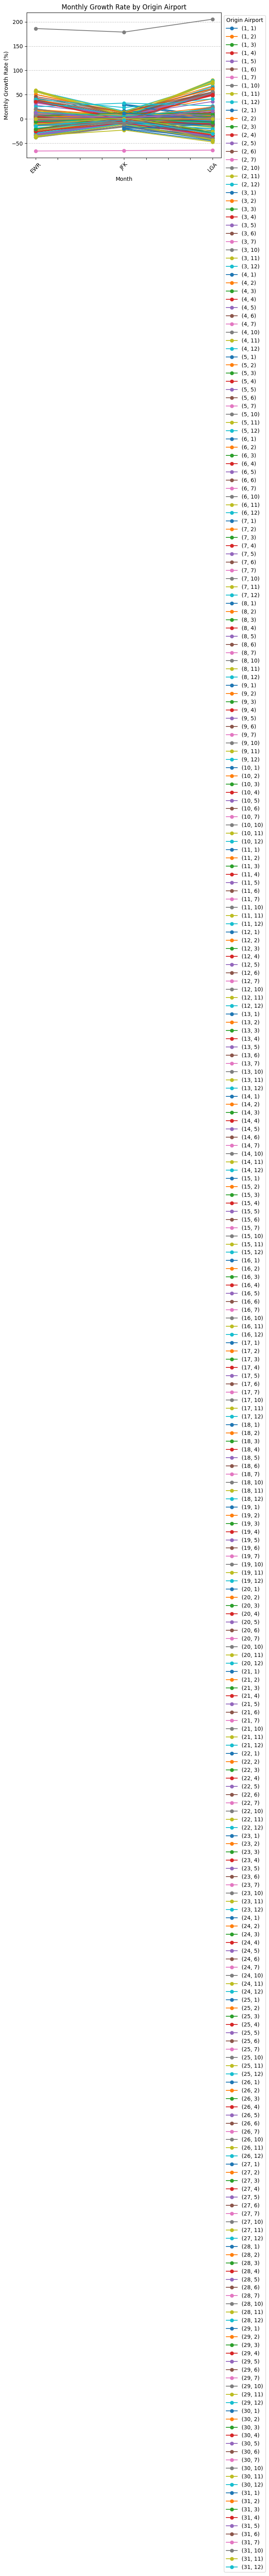

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'depart_time_dt' is already converted to datetime format

# Extract month and days_in_month
df_flights['month'] = df_flights['depart_time_dt'].dt.month
df_flights['days_in_month'] = df_flights['depart_time_dt'].dt.day

# Calculate monthly traffic (number of flights) for each origin and month
monthly_traffic = df_flights.groupby(["origin", "month"])["days_in_month"].value_counts().unstack()

# Calculate monthly growth rate (percentage change) for each origin
monthly_growth_rate = monthly_traffic.pct_change().unstack() * 100

# Create a figure for the growth rate plot
plt.figure(figsize=(12, 10))

# Plot the growth rate curve
monthly_growth_rate.plot(kind='line', marker='o')

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Monthly Growth Rate (%)')
plt.title('Monthly Growth Rate by Origin Airport')
plt.legend(title='Origin Airport',  loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for reference

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


In [102]:
df_flights[["carrier","dest","origin"]].groupby("carrier").value_counts().sort_values(ascending=False)

carrier  dest  origin
DL       ATL   LGA       4183
AA       ORD   LGA       4151
         DFW   LGA       3683
US       DCA   LGA       3536
         BOS   LGA       3211
                         ... 
VX       SJC   JFK          1
DL       OMA   LGA          1
         JAX   LGA          1
         BNA   JFK          1
OO       ORD   LGA          1
Name: count, Length: 431, dtype: int64

C:\Users\Pierre-Antoine\AppData\Local\Temp\ipykernel_9700\1848711718.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x1000 with 0 Axes>

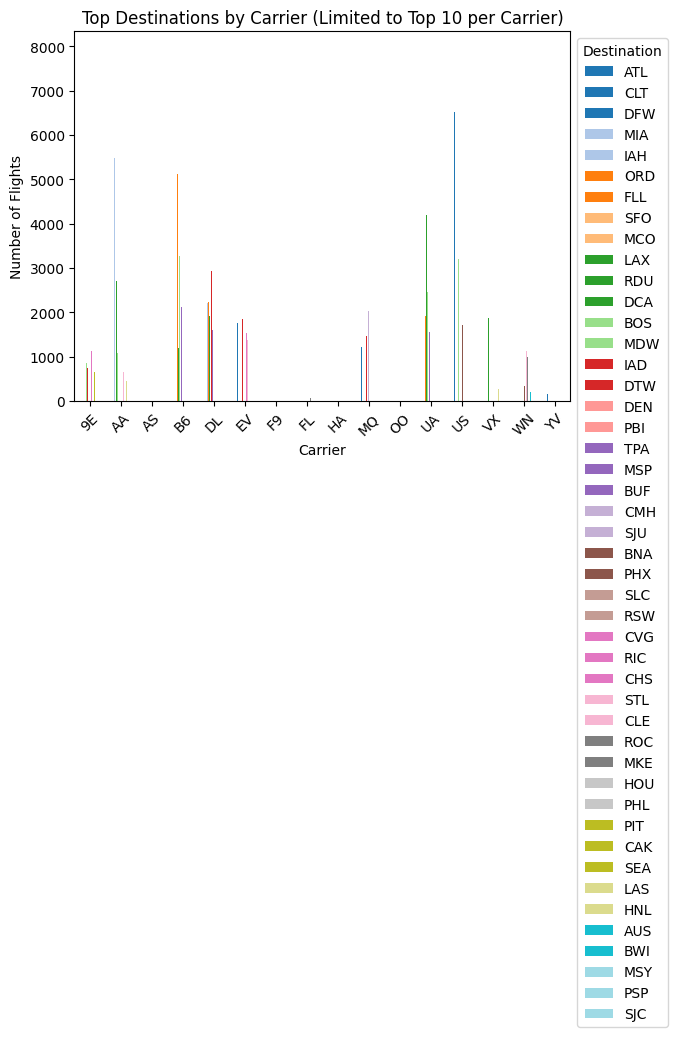

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the count of destinations per carrier and sort by descending order
carrier_destination_counts = (
    df_flights[["carrier", "dest"]].groupby("carrier")["dest"].value_counts().sort_values(ascending=False)
)

# Get the top 10 destinations per carrier (optional)
top_10_destinations_per_carrier = carrier_destination_counts.groupby(level=0).head(10)

# Create a bar chart
plt.figure(figsize=(12, 10))
top_10_destinations_per_carrier.unstack().plot(kind="bar", colormap="tab20")

# Customize the plot
plt.xlabel("Carrier")
plt.ylabel("Number of Flights")
plt.title("Top Destinations by Carrier (Limited to Top 10 per Carrier)")
plt.legend(title="Destination", loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend location as needed
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [104]:
df_flights.head(2)

,dep_delay,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,time_hour,id,depart_time_dt,sched_depart_time_dt,arrive_time_dt,sched_arrive_time_dt,month,days_in_month,daily_traffic
0,2,11,UA,1545,N14228,EWR,IAH,227,1400,2021-01-01T05:00:00Z,1,2021-01-01 05:17:00+00:00,2021-01-01 05:15:00,2021-01-01 08:30:00,2021-01-01 08:19:00,1,1,1.0
1,4,20,UA,1714,N24211,LGA,IAH,227,1416,2021-01-01T05:00:00Z,2,2021-01-01 05:33:00+00:00,2021-01-01 05:29:00,2021-01-01 08:50:00,2021-01-01 08:30:00,1,1,1.0


In [173]:
day_in_the_month = df_flights["depart_time_dt"].dt.day
vol_daily = df_flights[["origin","dest"]].groupby(df_flights["depart_time_dt"].dt.days_in_month)
vol_daily.value_counts()[0:20]

depart_time_dt  origin  dest
28              JFK     LAX     834
                LGA     ATL     798
                JFK     SFO     597
                LGA     ORD     554
                EWR     ORD     475
                JFK     BOS     447
                LGA     MIA     424
                JFK     MCO     420
                EWR     MCO     418
                JFK     FLL     402
                LGA     CLT     400
                        DFW     392
                EWR     BOS     391
                LGA     DTW     388
                        DCA     380
                EWR     CLT     378
                JFK     SJU     378
                EWR     FLL     346
                LGA     BOS     344
                EWR     ATL     328
Name: count, dtype: int64

In [188]:
start_date =(df_flights["depart_time_dt"].dt.month >= 11)
vol_nov_dec = df_flights.loc[start_date]


,dep_delay,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,time_hour,id,depart_time_dt,sched_depart_time_dt,arrive_time_dt,sched_arrive_time_dt,month,days_in_month,daily_traffic
55893,6,7,B6,745,N568JB,JFK,PSE,205,1617,2021-11-01T23:00:00Z,55894,2021-11-01 05:00:00+00:00,2021-11-01 07:59:00,2021-11-01 03:52:00,2021-11-01 03:45:00,11,1,11.000000
55894,105,87,B6,1816,N353JB,JFK,SYR,36,209,2021-11-01T22:00:00Z,55895,2021-11-01 03:05:00+00:00,2021-11-01 06:10:00,2021-11-01 01:23:00,2021-11-01 07:56:00,11,1,11.000000
55895,-5,-10,US,1895,N192UW,EWR,CLT,88,529,2021-11-01T05:00:00Z,55896,2021-11-01 04:55:00+00:00,2021-11-01 05:00:00,2021-11-01 06:41:00,2021-11-01 06:51:00,11,1,11.000000
55896,-6,29,UA,1714,N38727,LGA,IAH,229,1416,2021-11-01T05:00:00Z,55897,2021-11-01 05:39:00+00:00,2021-11-01 05:45:00,2021-11-01 08:56:00,2021-11-01 08:27:00,11,1,11.000000
55897,-3,-24,AA,2243,N5CLAA,JFK,MIA,147,1089,2021-11-01T05:00:00Z,55898,2021-11-01 05:42:00+00:00,2021-11-01 05:45:00,2021-11-01 08:31:00,2021-11-01 08:55:00,11,1,11.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111291,,,UA,1729,,EWR,DEN,,1605,2021-12-31T07:00:00Z,111292,2021-12-31 00:00:00+00:00,2021-12-31 07:05:00,2021-12-31 00:00:00,2021-12-31 09:31:00,12,31,0.387097
111292,,,US,1831,,JFK,CLT,,541,2021-12-31T08:00:00Z,111293,2021-12-31 00:00:00+00:00,2021-12-31 08:25:00,2021-12-31 00:00:00,2021-12-31 01:29:00,12,31,0.387097
111293,,,MQ,3301,N844MQ,LGA,RDU,,431,2021-12-31T16:00:00Z,111294,2021-12-31 00:00:00+00:00,2021-12-31 11:15:00,2021-12-31 00:00:00,2021-12-31 14:20:00,12,31,0.387097
111294,,,UA,219,,EWR,ORD,,719,2021-12-31T06:00:00Z,111295,2021-12-31 00:00:00+00:00,2021-12-31 06:00:00,2021-12-31 00:00:00,2021-12-31 07:35:00,12,31,0.387097


In [197]:





# Convert 'depart_time_dt' to datetime format (assuming it's a string)
df_flights['depart_time_dt'] = pd.to_datetime(df_flights['depart_time_dt'], utc=True)

# Extract month and day of week for calculations
df_flights['month'] = df_flights['depart_time_dt'].dt.month
df_flights['day_of_week'] = df_flights['depart_time_dt'].dt.dayofweek

# Define weekend category (assuming 0 is Monday)
def weekend_category(day):
  if day in [0, 6]:  # Adjust if weekends start/end on different days
    return 'Weekend'
  else:
    return 'Weekday'

# Create 'day_of_week' category
df_flights['day_of_week_category'] = df_flights['day_of_week'].apply(weekend_category)

# Daily traffic (assuming 'traffic' is total traffic)
df_flights['daily_traffic'] = df_flights['month'] / df_flights['days_in_month']

# Special Days (Filter for specific dates)
special_days = ['2021-12-25', '2022-01-01', '2021-07-04', '2021-11-29']  # Adjust dates as needed
special_days_df_flights = df_flights[df_flights['depart_time_dt'].dt.strftime('%Y-%m-%d').isin(special_days)]

print(f"Sepcial days flights: {special_days_df_flights}")

# Summer Months (Filter for July, August, September)
summer_months = [7, 8, 9]
summer_df_flights = df_flights[df_flights['month'].isin(summer_months)]

print(f"summer flight: {summer_df_flights}")
# Early Morning Departure (Filter for departures between 00:00 and 06:00)
early_morning_df_flights = df_flights[(df_flights['depart_time_dt'].dt.hour >= 0) & (df_flights['depart_time_dt'].dt.hour < 6)]


print(f"early morning flights: {early_morning_df_flights}")





Sepcial days flights:        dep_delay arr_delay carrier  flight tailnum origin dest air_time  \
81643          3       -19      UA    1012  N73406    EWR  IAH      194   
81644          4         0      AA    2243  N5CLAA    JFK  MIA      151   
81645         -5        -4      B6     939  N779JB    JFK  BQN      201   
81646         -8        -5      B6     371  N613JB    LGA  FLL      149   
81647         -5        11      B6    1403  N521JB    JFK  SJU      211   
...          ...       ...     ...     ...     ...    ...  ...      ...   
105946        -2        -4      B6     839  N784JB    JFK  BQN      194   
105947                          DL    2231  N312US    LGA  DTW            
105948                          MQ    2840  N8EGMQ    LGA  STL            
105949                          MQ    3230  N524MQ    JFK  DCA            
105950                          MQ    3535  N509MQ    JFK  CMH            

        distance             time_hour      id            depart_time_dt  \
8